# DOKUMENTASI TAHAPAN ANALISIS DATA UAS PEMROGRAMAN DASAR SAINS DATA KELAS IF-7 KELOMPOK MATPLOTLIB
- Kelompok : Matplotlib
- Anggota : </br>
10122236 - M Rijal Fadillah</br>
10122237 - M Elsiano Gibran A</br>
10122246 - Silvia Meida</br>
10122248 - Jihan Salsabila</br>
10122249 - Efelien Anindya Shifani</br>
10122250 - Muhammad Andrata Zharfan Mustikaharfan M

## Pertanyaan Bisnis / Kasus Analisis Data

- Pertanyaan 1 : Jika kategori produk menurut beratnya seperti berikut: Ringan (500g - 1Kg), Sedang (1Kg - 5Kg), berat (> 5Kg). Berapakah jumlah produk di setiap kategorinya dan produk mana yang paling banyak? - 1022250 - M Andrata Zharfan M
- Pertanyaan 2 : Berapa banyak barang yang sampai ke pelanggan dalam kurun waktu kurang dari 30 hari setelah pelanggan memesannya? - 10122237 - Muhammad Elsiano G. A
- Pertanyaan 3 : Berdasarkan data customer, Negara mana yang melakukan order terbanyak? - 10122236 - M Rijal Fadillah
- Pertanyaan 4 : Metode pembayaran apa yang paling sering digunakan oleh konsumen dan bagaimana distribusi value pembayarannya? - 10122249 - Efelien Anindya Shifani
- Pertanyaan 5 : Berdasarkan data seller, gambarkan distribusi kota penjual dan tampilkan kota mana yang penyebarannya paling banyak dan yang paling sedikit beserta jumlah penjualnya? - 10122248 - Jihan Salsabila
- Pertanyaan 6 : Berapa persentase rating terbesar yang diberikan oleh konsumen? - 10122246 - Silvia Meida

## Menyaipkan semua library yang dibutuhkan

In [2]:
#import requirements
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from streamlit_option_menu import option_menu

## Melakukan Load Data CSV

In [3]:
@st.cache_data
#Load Data CSV
def load_data(url) :
    df = pd.read_csv(url)
    return df

2024-02-14 15:47:00.180 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


# PENGERJAAN 10122250 - MUHAMMAD ANDRATA ZHARFAN MUSTIKA

In [4]:
#Pengerjaan Andrata
def analisis_berat_produk(df_data_produk) :
    #Mengambil data produk
    berat_produk = df_data_produk['product_weight_g'].values
    
    #Cleaning data dengan menghapus nilai null pada 'products_dataset.csv'
    df_data_produk.dropna(subset=['product_category_name','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm'], axis=0, inplace=True)

    df_data_produk.reset_index(drop=True, inplace=True)

    #Mengambil jumlah barang kategori ringan (500g - 1Kg)
    produk_ringan = berat_produk[(berat_produk >= 500) & (berat_produk < 1000)]

    #Mengambil jumlah barang kategori sedang (1Kg - 5Kg)
    produk_sedang = berat_produk[(berat_produk >= 1000) & (berat_produk < 5000)] 

    #Mengambil jumlah barang kategori berat (> 5Kg)
    produk_berat = berat_produk[berat_produk >= 5000]

    #Menghitung value dari kategori berat 'ringan','sedang','berat'
    jumlah_Produk_ringan = len(produk_ringan)
    jumlah_Produk_sedang = len(produk_sedang)
    jumlah_Produk_berat = len(produk_berat)

    # Menampilkan lima baris pertama dari data CSV
    st.header("Bentuk data produk")
    st.dataframe(df_data_produk.head())

    #Menjelaskan Pengkategorian Berat barang
    st.write("""Akan dilakukan pengkategorian berat barang untuk melihat produk dengan rentang berat berapa yang memiliki jumlah terbanyak.
            Berat produk akan dibagi menjadi 3 Kategori Yaitu :\n 1. Kategori 'Ringan' dengan rentang berat 500g - 1Kg.
            \n2. Kategori 'Sedang' dengan rentang berat 1Kg - 5Kg.\n 3. Kategori 'Berat' dengan rentang berat > 5Kg""")
    
    st.write('<hr>', unsafe_allow_html=True)

    #Grafik kategori berat produk
    data_berat_produk = pd.DataFrame({
        'Kategori': ['Ringan', 'Sedang', 'Berat'],
        'Rentang' : ['500g - 1Kg', '1Kg - 5Kg', '> 5Kg'],
        'Jumlah': [jumlah_Produk_ringan, jumlah_Produk_sedang, jumlah_Produk_berat]
    })

    #Pengkategorian berat produk
    st.header("Grafik berat produk")
    st.dataframe(data_berat_produk)

    # Presentasi jumlah produk per kategori dengan bar chart
    label = data_berat_produk['Kategori']
    data = data_berat_produk['Jumlah']

    fig, ax = plt.subplots()
    ax.bar(label, data, color=['green' if kategori == 'Ringan' else 
        'blue' if kategori == 'Sedang' else 'red' for kategori in label])
    ax.set_xlabel('Kategori')
    ax.set_ylabel('Jumlah')

    #Menambahkan Label Pada Setiap Bar
    for i in range (len(label)) :
        ax.text(label[i], data[i], str(data[i]), ha='center', va='bottom' )

    #tampil         
    st.pyplot(fig)

    #Expander Grafik
    with st.expander("Penjelasan Grafik Berat Produk") :
        st.write("""Dari Grafik diatas, dapat dilihat bahwa produk dengan kategori berat 'Sedang' memiliki jumlah terbanyak yaitu sebanyak
                9203 produk, disusul oleh produk dengan kategori 'Ringan' sebanyak 7085 produk, dan yang paling sedikit adalah produk
                dengan kategori 'berat' dengan jumlah 4197 produk. Kita dapat pula melihat berapa perbandingan persentase tiap kategori melalui diagram pie. """) 


    st.write('<hr>', unsafe_allow_html=True)

    #Presentasi persentasi perbandingan data dengan pie chart
    # Data
    label = ['Ringan (500g - 1Kg)', 'Sedang (1Kg - 5Kg)', 'Berat (> 5Kg)']
    banyak_barang = [jumlah_Produk_ringan, jumlah_Produk_sedang, jumlah_Produk_berat]

    # Plot pie
    fig, ax = plt.subplots()
    ax.pie(banyak_barang, labels=label, autopct='%1.1f%%', shadow=True)

    # Tampil pie
    st.header('Perbandingan Berat Produk')
    st.pyplot(fig)

    with st.expander("Penjelasan Pie Perbandingan Berat produk") :
        st.write("""Dari pie diatas, dapat dilihat bahwa produk kategori 'Sedang' memiliki persentase terbesar yaitu sebanyak 44.9% (9203 produk),
                disusul dengan kategori 'Ringan' sebanyak 34.6% (7085 produk), dan kategori 'Berat' sebanyak 20.5% (4197 produk).""")
        
    st.write("""Analisis ini dapat berguna bagi perusahaan apabila misalnya suatu perusahaan ingin membagi-bagi produk ke dalam beberapa kategori yang 
            diambil berdasarkan berat produknya. Hal ini bisa dijadikan pertimbangan pengambilan keputusan oleh sebuah perusahaan, misalnya kendaraan apa yang
            harus banyak dimiliki perusahaan untuk pengantaran paket produk, penambahan fitur klasifikasi berat produk di aplikasi e-commerce, 
            dll.""")
        
    #Deskripsi Anggota yang mengerjakan bagian ini
    st.write('<hr>', unsafe_allow_html=True)
    st.caption("10122250 - Muhammad Andrata Zharfan Mustika")

# PENGERJAAN 10122237 - M Elsiano Gibran A

In [5]:
#Pengerjaan Elsiano       
def lama_pengiriman(df_data_order):
    #Cek apakah ada missing value atau tidak
    df_data_order_null = df_data_order.isnull().values.any()
    df_data_order.isnull().sum()

    #Cek apakah ada data duplikat atau tidak
    df_data_order_duplicate = df_data_order.duplicated().values.any()

    #Cleaning data products_dataset.csv
    df_data_order.dropna(subset=['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date'], axis=0, inplace=True)
    df_data_order.reset_index(drop=True, inplace=True)

    #Mengubah kolom 'order_purchase_timestamp' dan 'order_delivered_customer_date' menjadi tipe data datetime
    df_data_order['order_purchase_timestamp'] = pd.to_datetime(df_data_order['order_purchase_timestamp'])
    df_data_order['order_delivered_customer_date'] = pd.to_datetime(df_data_order['order_delivered_customer_date'])
    
    #Menghitung berapa lama pembeli menerima barang setelah memesannya
    df_data_order['lama_pengiriman'] = (df_data_order['order_delivered_customer_date'] - df_data_order['order_purchase_timestamp']).dt.days

    #Menampilkan DataFrame dengan kolom tambahan 'lama_pengiriman'
    st.write("Tabel hasil perhitungan lama pengiriman :")
    df_data_beli = df_data_order['order_delivered_customer_date']
    df_data_sampai = df_data_order['order_purchase_timestamp']
    lama_kirim = df_data_order['lama_pengiriman']

    tabel_hasil = pd.DataFrame({
        'Tanggal pembelian' : df_data_beli,
        'Tanggal sampai' : df_data_sampai,
        'Lama Pengiriman' : lama_kirim
    })

    #Mengambil data lama pengiriman barang
    waktu_pengiriman = df_data_order['lama_pengiriman'].values

    #Mengambil jumlah barang dengan waktu pengiriman kurang dari 30 hari
    waktu_U30 = waktu_pengiriman[(waktu_pengiriman >= 1) & (waktu_pengiriman < 30)]
    jumlah_waktu_U30 = len(waktu_U30)

    #Mengambil jumlah barang dengan waktu pengiriman lebih dari sama dengan 30 hari
    waktu_A30 = waktu_pengiriman[(waktu_pengiriman >= 30)]
    jumlah_waktu_A30 = len(waktu_A30)

    #Memvisualisasikan data lama pengiriman
    fig, ax = plt.subplots()
    ax.hist(df_data_order['lama_pengiriman'], bins=30, color='lightgreen', edgecolor='black')
    ax.set_title('Histogram Lama Pengiriman')
    ax.set_xlabel('Lama Pengiriman (hari)')
    ax.set_ylabel('Frekuensi')
    ax.set_xlim(0, 80)

    #menampilkan tabel hasil perhitungan
    st.dataframe(tabel_hasil)

    #menampilkan hasil visualisasi data lama pengiriman
    st.write('Diagram Lama Pengiriman Paket Kepada Pelanggan')
    st.pyplot(fig)    

    #Banyak barang yang waktu pengirimannya kurang dari 30 hari dan lebih dari sama dengan 30 hari
    st.write('Banyak barang yang waktu pengirimannya lebih 30 hari =', jumlah_waktu_U30)
    st.write('Banyak barang yang waktu pengirimannya lebih dari sama dengan 30 hari =', jumlah_waktu_A30)

    with st.expander("Conclusion dari pertanyaan kedua") :
        st.write(
            """
            - Conclution pertanyaan 2 \n
                Berdasarkan histogram di atas dapat diketahui bahwa 
                banyak barang yang waktu sampainya kurang dari 30 hari lebih banyak 
                dibandingkan dengan barang yang waktu sampainya lebih dari 30 hari. 
                Dengan jumlah barang yang waktu sampainya kurang dari 30 hari adalah 91896, 
                sedangkan barang yang waktu sampainya lebih dari 30 hari adalah 4552. 
                Dengan demikian perusahaan tetap bisa memakai jasa ekspedisi yang sekarang digunakan 
                karena waktu pengirimannya masih dalam batas wajar.
            """
        )

    #Deskripsi Anggota yang mengerjakan bagian ini
    st.write('<hr>', unsafe_allow_html=True)
    st.caption("10122237 - Muhammad Elsiano Gibran Alkaf")

# PENGERJAAN 10122246 - Silvia Meida

In [6]:
#Pengerjaan Silvia Meida
def reviews_order(df_data_reviews):
    #Cek apakah ada missing value atau tidak
    missing_values = df_data_reviews.isnull().values.any()
    df_data_reviews.isnull().sum()

    #Cek apakah ada data duplikat atau tidak
    df_data_reviews_duplicate = df_data_reviews.duplicated().values.any()

    #Menghitung Rating terbanyak yang diberikan oleh Konsumen
    rating_counts = df_data_reviews['review_score'].value_counts()
    most_common_rating = rating_counts.idxmax()
    most_common_rating_counts = rating_counts.max()

    # Menampilkan Rating tertinggi dengan Tabel
    st.subheader('Tabel Rating Konsumen')
    st.table(rating_counts)
    
    #Menampilkan Rating terbanyak yang diberikan oleh Konsumen
    st.write('Rating Tertinggi                         : ', most_common_rating)
    st.write('Jumlah Konsumen dengan Rating Tertinggi  : ', most_common_rating_counts)

    #Memvisualisasikan reviews order
    fig, ax = plt.subplots()
    rating_counts = df_data_reviews['review_score'].value_counts()
    labels = rating_counts.index
    sizes = rating_counts.values

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
    ax.axis('equal')  
    ax.set_title('Distribution of Ratings')
    
    #Menampilkan Pie Chart Rating Order
    st.subheader('Konsumen dengan Rating tertinggi ')
    st.pyplot(fig)

    with st.expander("Conclusion dari pie chart di atas") :
        st.write(
            """
                Berdasarkan Pie Chart di atas dapat diambil kesimpulan bahwa Skor Rating tertingginya adalah 5 dengan jumlah persentase nya 57.8%.
            """
        )

    #Deskripsi Anggota yang mengerjakan bagian ini
    st.write('<hr>', unsafe_allow_html=True)
    st.caption("10122250 - Silvia Meida")

# PENGERJAAN 10122248 - Jihan Salsabila

In [7]:
#Pengerjaan Jihan Salsabila
def distribusi_produk(df_seller):
    #Cek apakah ada missing value atau tidak
    df_seller_null = df_seller.isnull().values.any()
    
    #Cek apakah ada data duplikat atau tidak
    df_seller_duplicate = df_seller.duplicated().values.any()

    # Menampilkan judul
    st.title('Analisis Distribusi Kota Penjual')

    # Menghitung jumlah penjual di setiap kota
    city_counts = df_seller['seller_city'].value_counts()

    # Menghitung jumlah penjual di setiap kota
    city_counts = df_seller['seller_state'].value_counts()

    # Menampilkan data distribusi kota penjual paling banyak
    most_common_city = city_counts.idxmax()
    most_common_city_count = city_counts.max()

    st.subheader('Kota penjual paling banyak:')
    st.write(f"Nama Kota: {most_common_city}")
    st.write(f"Jumlah Penjual: {most_common_city_count}")

    # Mengambil 5 kota terbanyak
    top5_cities = city_counts.head()

    # Menampilkan tabel 5 kota terbanyak
    st.title('Top 5 Kota Penjual Paling Banyak')
    top5_cities_table = pd.DataFrame({
        'Kota': top5_cities.index,
        'Jumlah Penjual': top5_cities.values})
    st.table(top5_cities_table)

    # Menampilkan data distribusi kota penjual paling sedikit
    least_common_city = city_counts.idxmin()
    least_common_city_count = city_counts.min()

    st.subheader('Kota penjual paling sedikit:')
    st.write(f"Nama Kota: {least_common_city}")
    st.write(f"Jumlah Penjual: {least_common_city_count}")

    # Mengambil 5 kota ter sedikit
    bottom5_cities = city_counts.tail()

    # Menampilkan tabel 5 kota ter sedikit
    st.title('5 Kota Penjual Paling Sedikit')
    bottom5_cities_table = pd.DataFrame({
        'Kota': bottom5_cities.index,
        'Jumlah Penjual': bottom5_cities.values})
    st.table(bottom5_cities_table)


    # Menampilkan data distribusi kota penjual dalam bentuk diagram batang
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(city_counts.index, city_counts.values, color='skyblue', edgecolor='black')
    ax.set_title('Distribusi Kota Penjual')
    ax.set_xlabel('Kota Penjual')
    ax.set_ylabel('Jumlah Penjual')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    st.pyplot(fig)

    
    
    with st.expander("Conclusion dari pertanyaan 4") :
        st.write(
            """
            - Conclution pertanyaan 4 \n
            Berdasarkan diagram batang diatas dapat disimpulkan bahwa terdapat pendistribusian kepada 23 kota, dimana Kota dengan pendistribusian penjual paling banyak berada di kota Sao paulo dengan 
            Jumlah penjual diSsao paul sebanyak  69 orang dan jumlah pendistribusian kota paling sedikit berada di kota Taio dengan jumlah penjual sebanyak 1 orang.
            """
        )

        #Deskripsi Anggota yang mengerjakan bagian ini
        st.write('<hr>', unsafe_allow_html=True)
        st.caption("10122248 - Jihan Salsabila")

# PENGERJAAN 10122236 - M Rijal Fadillah

In [8]:
#Pengerjaan Rijal
def banyak_transaksi(df_transaksi) :
    #Gathering data
    df_data_customers = pd.read_csv('customers_dataset.csv')

    #Cek apa ada data duplikat
    df_data_customers_duplicate = df_data_customers.duplicated().values.any()
    print('ada data duplikat di data customers = ', df_data_customers_duplicate)

    #customers_dataset
    df_data_negara = df_data_customers['customer_state'].value_counts()

    #membuat fungction Tabel

    #membuat header
    st.header("Tabel")
    
    #mengambil data , sekaligus mengelompokannya
    df_data_negara = df_data_customers['customer_state'].value_counts()
    st.table(df_data_negara)

    #membuat mpenjelasan untuk tabel
    with st.expander("Lihat Penjelasan"):
        st.write(
        """
        Dalam tabel ini, pengelompokan dilakukan dengan cara menghitung setiap negara yang disebutkan saat terjadinya transaksi,dan negara yang disebut dihitung sebagai 1. Hal ini menghasilkan tampilan tabel ini.    
        """
        )

        #membuat fungction Grafik transaksi

        #membuat header
    st.header("Grafik dengan transaksi terbanyak")

    #membuat grafik batang
    chart_data = pd.DataFrame(df_data_negara.values, columns=["a"], index=df_data_negara.index)
    st.bar_chart(chart_data)
    
    #membuat mpenjelasan untuk grafik batang
    with st.expander("Lihat Penjelasan"):
        st.write(
        """
        Dari gambar grafik di atas, terlihat bahwa negara bagian dengan jumlah transaksi terbanyak adalah SP.    
        """
    )    

    #Deskripsi Anggota yang mengerjakan bagian ini
    st.write('<hr>', unsafe_allow_html=True)
    st.caption("10122237 - M Rijal F") 

# PENGERJAAN 10122249 - Efelien Anindya Shifani

In [9]:
def metode_payment(df_data_payments):
    #Cek apakah ada missing value atau tidak
    missing_values = df_data_payments.isnull().values.any()
    df_data_payments.isnull().sum()

    #Cek apakah ada data duplikat atau tidak
    df_data_payments_duplicate = df_data_payments.duplicated().values.any()

    st.title("Analisis Metode Transaksi yang Digunakan Konsumen Serta Pendistribusian Value Transaksi")

    #Mengetahui jumlah transaksi dari setiap metode pembayaran yang berbeda
    st.subheader("Tabel Metode Transaksi")
    payment_type_counts = df_data_payments['payment_type'].value_counts().reset_index()
    payment_type_counts = payment_type_counts.rename(columns={'payment_type': 'Metode Transaksi','count' : 'Jumlah Transaksi'})
    st.dataframe(payment_type_counts)

    #Mengetahui jumlah transaksi yang telah dilakukan
    totalTipePayment = df_data_payments['payment_type'] 
    st.write("Total transaksi yang telah dilakukan adalah sebanyak ", len(totalTipePayment))

    st.write('<hr>', unsafe_allow_html=True)

    #Menampilkan line chart 
    st.subheader("Grafik Metode Transaksi")
    st.line_chart(payment_type_counts.set_index('Metode Transaksi'))
    with st.expander("Lihat Penjelasan") :
        st.write(
            """
                Berdasarkan Line Chart di atas dapat diambil kesimpulan bahwa metode transaksi yang paling banyak digunakan oleh konsumen adalah credit card dengan jumlah 76.795 transaksi.
            """
        )

    st.write('<hr>', unsafe_allow_html=True)
    
    #Mengetahui pendistribusian besar tiap transaksi 
    st.subheader('Pendistibusian Value Transaksi')
    st.write('Untuk mengetahui berapa banyak saldo transaksi yang dikeluarkan konsumen maka akan dilakukan pendistribusian value transaksi.')
    def assign_color(value):
        if value < 100:
            return 'yellow'
        elif 100 <= value < 500:
            return 'green'
        elif 500 <= value < 1000:
            return 'blue'
        elif 1000 <= value < 5000:
            return 'purple'
        elif 5000 <= value < 10000:
            return 'lightgreen'
        else:
            return 'red'
    
    colors = df_data_payments['payment_value'].apply(assign_color)

    st.subheader("Scatter Plot Distribusi Value Transaksi")
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(df_data_payments.index, df_data_payments['payment_value'], alpha=0.5, c=colors)
    ax.set_title('Scatter Plot Distribusi Value Transaksi')
    ax.set_xlabel('Indeks Data Transaksi')
    ax.set_ylabel('Value Transaksi')
    ax.grid(True, linestyle='--', alpha=0.7)
    st.pyplot(fig)
    
    with st.expander("Lihat Penjelasan") :
        st.write(
            """
                Berdasarkan Scatter Plot di atas dapat diambil kesimpulan bahwa konsumen paling banyak melakukan transaksi sampai range sebesar 4000.
            """
        )
    
    st.write('<hr>', unsafe_allow_html=True)

    #Kesimpulan
    st.subheader('Conclusion')
    st.write('Dapat disimpulkan bahwa metode transaksi yang paling banyak digunakan yaitu credit card dengan jumlah 76.795 transaksi. Lalu dengan dilakukan pendistribusian value transaksi bisa diketahui bahwa sebagian besar konsumen melakukan transaksi sampai range sebesar 4000. Hal ini dapat membantu sebuah perusahaan dalam menyediakan beberapa jenis credit card untuk transaksi, dan juga setelah mengetahui pendistribusian value transaksi perusahaan bisa meningkatkan value transaksi seperti mengadakan voucher dengan minimum pembayaran.')

    #Deskripsi Anggota yang mengerjakan bagian ini
    st.write('<hr>', unsafe_allow_html=True)
    st.caption("10122249 - Efelien Anindya Shifani")

## Memanngil seluruh dataset csv dari github

In [10]:
#File CSV yang dibutuhkan
df_data_produk = load_data("https://raw.githubusercontent.com/MAndrataZ/UASPDSD_Matplotlib/main/products_dataset.csv")
df_data_order = load_data("https://raw.githubusercontent.com/MAndrataZ/UASPDSD_Matplotlib/main/orders_dataset.csv")
df_data_reviews = load_data('https://raw.githubusercontent.com/MAndrataZ/UASPDSD_Matplotlib/main/order_reviews_dataset.csv')
df_seller = load_data('https://raw.githubusercontent.com/MAndrataZ/UASPDSD_Matplotlib/main/sellers_dataset.csv')
df_transaksi = load_data("https://raw.githubusercontent.com/MAndrataZ/UASPDSD_Matplotlib/main/customers_dataset.csv")
df_data_payments = load_data("https://raw.githubusercontent.com/MAndrataZ/UASPDSD_Matplotlib/main/order_payments_dataset.csv")

2024-02-14 15:47:00.483 
  command:

    streamlit run C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-02-14 15:47:00.487 No runtime found, using MemoryCacheStorageManager


## Mengatur Tampilan dari seluruh menu dan sidebar

2024-02-14 15:47:29.589 Session state does not function when running a script without `streamlit run`


ada data duplikat di data customers =  False


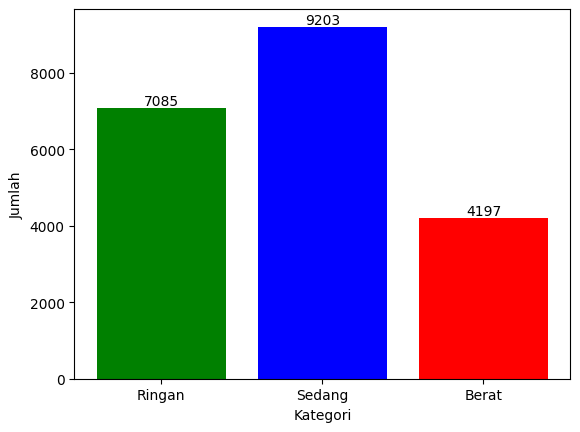

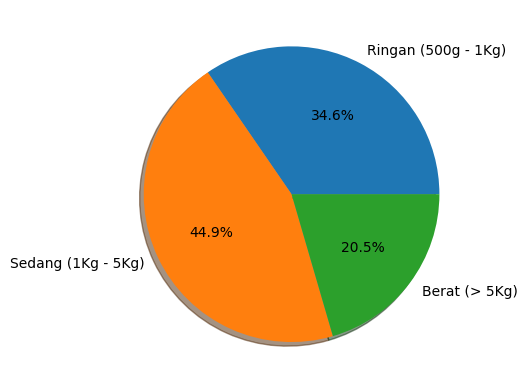

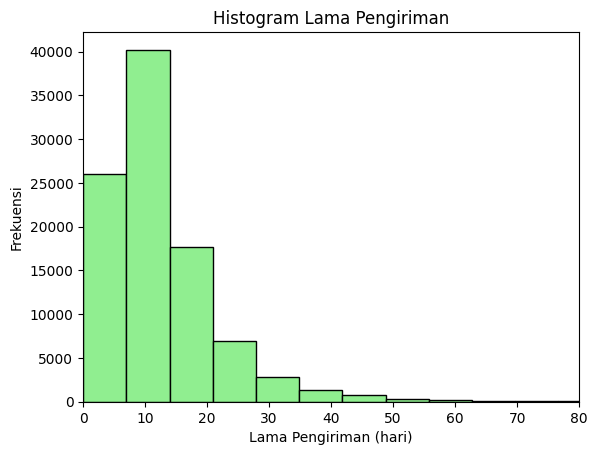

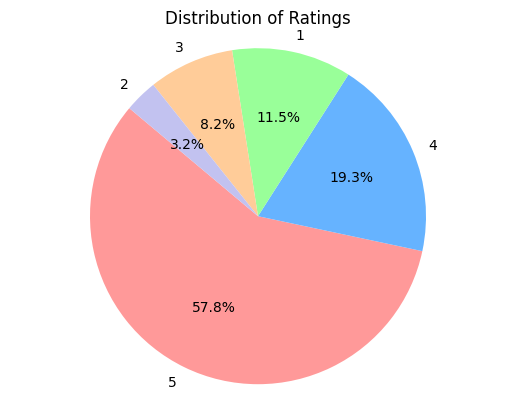

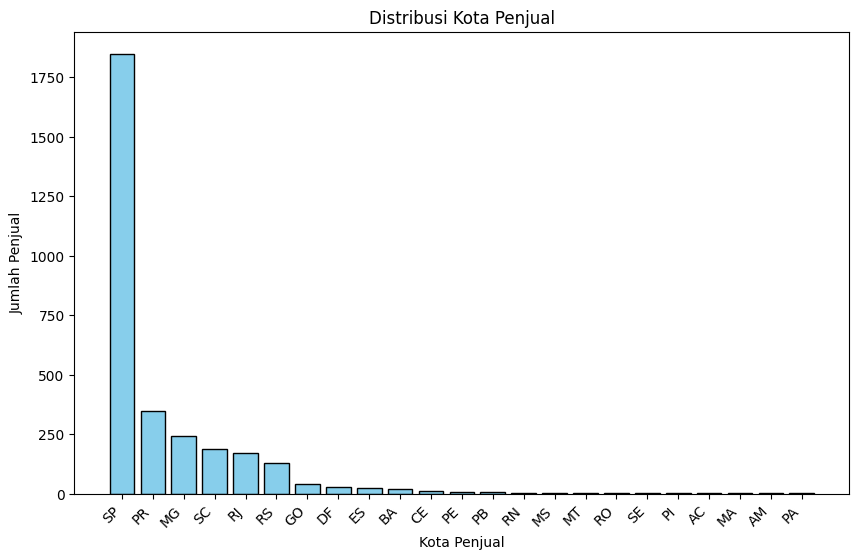

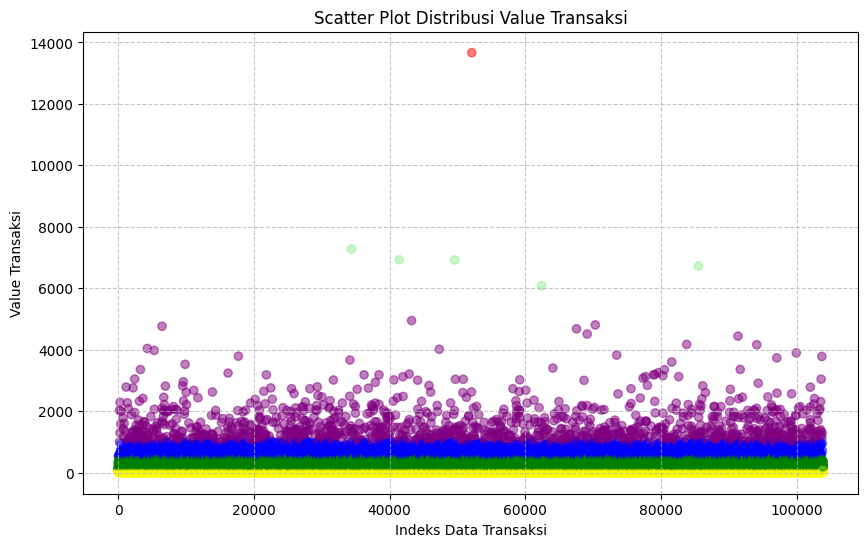

In [11]:
#Tampilan
with st.sidebar :
    selected = option_menu('Menu',['Dashboard','About'],
    icons =["easel2", "info-circle"],
    menu_icon="cast",
    default_index=0)
    
if (selected == 'Dashboard') :
    st.header(f"Dashboard Analisis E-Commerce")
    tab1,tab2,tab3,tab4,tab5,tab6 = st.tabs(["Pengkategorian Berat Produk", "Analisis Waktu Pengiriman", "Analisis Rating Konsumen","Analisis Pendistribusian Berdasarkan Kota","Analisis Banyaknya Transaksi","Analisis Metode Transaksi"])

    with tab1 :
        analisis_berat_produk(df_data_produk)
    with tab2 :
        lama_pengiriman(df_data_order)
    with tab3 :
        reviews_order(df_data_reviews)
    with tab4 :
        distribusi_produk(df_seller)
    with tab5 :
        banyak_transaksi(df_transaksi)
    with tab6 :
        metode_payment(df_data_payments)


else :
    if (selected == 'About') :
        st.title("Profile Mahasiswa")

        st.write('<hr>', unsafe_allow_html=True)
        st.write("NIM               : 10122250")
        st.write("NAMA              : Muhammad Andrata Zharfan Mustika")
        st.write("KELAS             : IF-7")
        st.write("BAGIAN PENGERJAAN : Pengkategorian Berat Produk")
        
        st.write('<hr>', unsafe_allow_html=True)
        st.write("NIM               : 10122237")
        st.write("NAMA              : Muhammad Elsiano Gibran Alkaf")
        st.write("KELAS             : IF-7")
        st.write("BAGIAN PENGERJAAN : Analisis Waktu Pengiriman")

        st.write('<hr>', unsafe_allow_html=True)
        st.write("NIM    : 10122246")
        st.write("NAMA   : Silvia Meida")
        st.write("KELAS  : IF-7")
        st.write("BAGIAN PENGERJAAN : Analisis Rating Konsumen")

        st.write('<hr>', unsafe_allow_html=True)
        st.write("NIM    : 10122248")
        st.write("NAMA   : Jihan Salsabila")
        st.write("KELAS  : IF-7")
        st.write("BAGIAN PENGERJAAN : Analisis Pendistribusian Berdasarkan Kota")

        st.write('<hr>', unsafe_allow_html=True)
        st.write("NIM    : 10122236")
        st.write("NAMA   : M Rijal Fadilah")
        st.write("KELAS  : IF-7")
        st.write("BAGIAN PENGERJAAN : Analisis Banyak Transaksi")

        st.write('<hr>', unsafe_allow_html=True)
        st.write("NIM    : 10122249")
        st.write("NAMA   : Efelien Anindya Shifani")
        st.write("KELAS  : IF-7")
        st.write("BAGIAN PENGERJAAN : Analisis Metode Transaksi")

        st.write('<hr>', unsafe_allow_html=True)
        st.caption("UAS Pemrograman Dasar Sains Data")